In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from math import exp, sqrt
import numpy as np

from scipy import optimize

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

%matplotlib inline



In [32]:
df = pd.read_csv('2019-ncov.csv',index_col=0)

# filling missing date by taking average of the previous and preceding dates
for country in df.columns:
    df[country]['2020-01-22'] = (df[country]['2020-01-21'] + df[country]['2020-01-23'])/2

df['Total_no_china'] = df.loc[:,df.columns != 'China'].sum(axis=1)
df['Total'] = df.loc[:,df.columns != 'Total_no_china'].sum(axis=1)


In [33]:
# dividing the countries by region

regions = {
    'china':['China'],
    'western pacific':['South Korea', 'Japan', 'Singapore', 'Malaysia',
                       'Australia','Philippines', 'Vietnam', 'Brunei',
                       'New Zealand', 'Cambodia', 'Mongolia', 'French Polynesia'],
    'european':['Italy', 'France', 'Spain', 'Germany', 'Switzerland', 'Denmark',
                'Netherlands', 'United Kingdom', 'Belgium', 'Austria', 'Norway',
                'Greece', 'Czech Republic', 'Israel', 'San Marino', 'Iceland',
               'Slovenia', 'Romania', 'Poland', 'Ireland', 'Portugal', 'Finland',
                'Georgia', 'Russia', 'Serbia', 'Luxembourg', 'Croatia', 'Latvia',
                'Estonia', 'Hungary', 'Belarus', 'Albania', 'Slovakia', 'Azerbaijan',
                'Bulgaria', 'North Macedonia', 'Cyprus', 'Malta', 'Bosnia and Herzegovina',
               'Moldova', 'Lithuania', 'Andorra', 'Armenia', 'Holy See', 'Liechtenstein',
                'Monaco', 'Turkey', 'Ukraine', 'Faroe Islands', 'Gibraltar', 'Guernsey', 'Jersey'],
    'south-east asia':['India', 'Thailand', 'Indonesia', 'Maldives', 'Bangladesh',
                       'Sri Lanka', 'Bhutan', 'Nepal'],
    'eastern mediteranean':['Iran', 'Qatar', 'Bahrain', 'Kuwait', 'United Arab Emirates',
                            'Iraq', 'Egypt', 'Lebanon', 'Saudi Arabia', 'Pakistan', 'Oman',
                            'Afghanistan', 'Tunisia', 'Morocco', 'Jordan', 'Palestine'],
    'americas':['United States', 'Canada', 'Brazil', 'Chile', 'Argentina', 'Ecuador', 
                'Peru', 'Costa Rica', 'Mexico', 'Panama', 'Colombia', 'Dominican Republic',
                'Paraguay', 'Bolivia', 'Honduras', 'Jamaica', 'French Guiana', 'Martinique',
                'Saint Martin', 'Saint Barthelemy', 'Antigua and Barbuda', 'Cayman Islands',
               'Cuba', 'Guadeloupe', 'Guyana', 'Kenya', 'Puerto Rico', 'Saint Vincent',
               'Venezuela'],
    'african':['Algeria', 'South Africa', 'Senegal', 'Burkina Faso', 'Cameroon', 'Nigeria',
               'Ivory Coast', 'Congo', 'Togo', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea',
              'Reunion', 'Sudan', 'Trinidad and Tobago']
       
}

In [34]:
for region, _ in regions.items():
    df_part = df[regions[region]]
    df_part['total'] = df_part.sum(axis=1)
    df_part = df_part.loc[df_part['total']>1] #checks for at least 10 cases

    # taking derivative
    d1 = df_part['total'].diff()

    dd1 = d1.reset_index(drop=True)
    dd1 = dd1.dropna()
    X = np.array(dd1.index)#.reshape(-1,1)
    y = np.array(dd1)#.reshape(-1,1)

    check = np.polyfit(np.array(dd1.index),np.array(dd1), deg=5, full=True)
    
    
    
    break
    
check

/home/eric/miniconda3/envs/geo_test/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([-4.11089838e-04,  6.39352734e-02, -3.38118838e+00,  6.52319795e+01,
        -2.39024963e+02,  3.79560379e+02]),
 array([3.02306063e+08]),
 6,
 array([2.30507023e+00, 7.85566700e-01, 2.57351213e-01, 5.68254493e-02,
        8.75786657e-03, 8.52769117e-04]),
 1.199040866595169e-14)

In [49]:
def fx(x, a,b,c):
    return a*np.exp(-(x-b)**2/(2*(c**2)))
params, params_cov = optimize.curve_fit(fx,X,y)

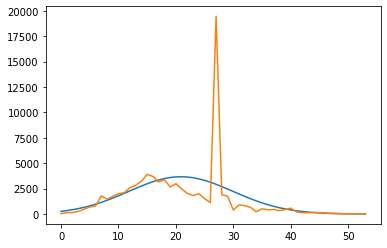

In [54]:
plt.plot(fx(X,*params))
plt.plot(y)
plt.show()

In [48]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [ ]:
days = 90
params = np.array([0.0001,0.0001,0.0001])
t = np.linspace(0,days,days)


def fx(x, params=params):
    a= params[0]
    b= params[1]
    c= params[2]
    return a*exp(-(x-b)**2/(2*(c**2)))

init = [fx,params]
f2 = np.vectorize(fx)

def cost(X,y, theta): #SSE
    m = len(y)
    h = fx(X @ theta)
    cost = (1/(2*m))*np.sum((h-y)**2)
    return 

def gradient_desc(X,y,params, learning_rate, iterations):
    m=len(y)
    cost_history = np.zeros((iterations,1))
    
    A=f2(X)
    
    a= params[0]
    b= params[1]
    c= params[2]
    
    N = len(X)
    a_deriv = 0
    b_deriv = 0
    c_deriv = 0
    for i in range(iterations):
            for ii in range(N):
                a_deriv +=  exp(-((X[i]-b)**2)/(2*c)**2)
                b_deriv += (a * exp(-((X[i]-b)**2)/2*c**2)) * ((X[i]-b)/c**2)
                c_deriv += (a * exp(-((X[i]-b)**2)/2*c**2)) * ((X[i]-b)**2/c**3)

            a -= 1/(2*len(y))*np.sum(-2*(y-A))*a_deriv
            b -= 1/(2*len(y))*np.sum(-2*(y-A))*b_deriv
            c -= 1/(2*len(y))*np.sum(-2*(y-A))*c_deriv
            params = np.array([a,b,c])
            cost_history[i] = cost(X,y)
        
    return (cost_history, params)


In [ ]:
learning_rate = 0.0001
iterations = 10

c, p =gradient_desc(X,y,params, learning_rate=learning_rate, iterations=iterations)

In [ ]:
a= params[0]
b= params[1]
c= params[2]

unp = (fx,p)
f3 = np.vectorize(*unp)


plt.plot(f2(t))
plt.show()

In [58]:
def fx(x, a,b,c):
    return a*np.exp(-(x-b)**2/(2*(c**2)))

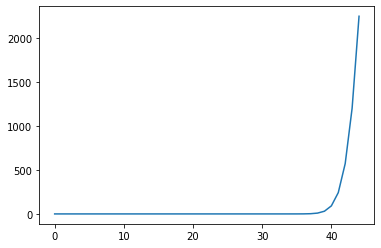

In [118]:
days = 45
t = np.linspace(0,days,days)


a= 9000
b= 50
c= -3
params=[a,b,c]
plt.plot(fx(t,*params))